#Sonification of human to human transmission of MERS coronavirus

- Author: Caitlin Rivers
- [Soundcloud link](https://soundcloud.com/caitlinrivers/mers_clusters/)
- Using package and code from [cirlabs](https://github.com/cirlabs/miditime)

In [63]:
from __future__ import division
from miditime.MIDITime import MIDITime
import pandas as pd
import epipy as epi
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
mymidi = MIDITime(120, 'docs_ex.midi', 5, 5, 1)

In [67]:
mers_df = pd.read_csv(path, infer_datetime_format=True, parse_dates=[14,17])

In [68]:
def clean_date(x):
    try:
        x = datetime.datetime.strptime(x, '%Y-%m-%d')
    except:
        x = np.nan
        
    return x

In [69]:
mers_df['onset_date'] = mers_df['onset'].map(clean_date)
mers_df['report_date'] = mers_df['reported'].map(clean_date)
mers_df['dates'] = mers_df['onset_date'].combine_first(mers_df['report_date'])

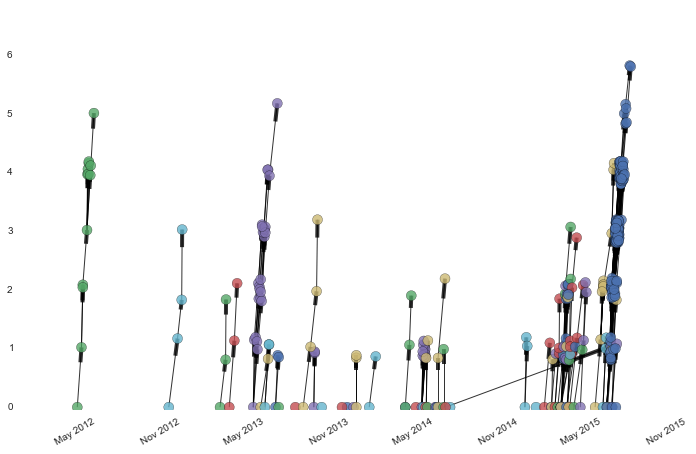

In [70]:
G, fig, ax = epi.case_tree_plot(mers_df, cluster_id='cluster', \
                    case_id='number', date_col='dates', gen_mean = 5, \
                    gen_sd = 4, color='cluster', legend=False)
fig.savefig('mers_clusters.png')

In [71]:
rows = []
for n in G.nodes():
    row = G.node[n]
    rows.append(row)
    
df = pd.DataFrame(rows)

In [72]:
def mag_to_pitch_tuned(magnitude):
    # Where does this data point sit in the domain of your data? (I.E. the min magnitude is 3, the max in 5.6). In this case the optional 'True' means the scale is reversed, so the highest value will return the lowest percentage.
    #scale_pct = mymidi.log_scale_pct(0, 8, magnitude)
    #print magnitude, scale_pct
    # Another option: Linear scale, reverse order
    # scale_pct = mymidi.linear_scale_pct(3, 5.7, magnitude, True)

    # Another option: Logarithmic scale, reverse order
    # scale_pct = mymidi.log_scale_pct(3, 5.7, magnitude, True)

    # Pick a range of notes. This allows you to play in a key.
    c_major = ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F']

    #Find the note that matches your data point
    note = mymidi.scale_to_note(magnitude/10, c_major)
    
    #Translate that note to a MIDI pitch
    midi_pitch = mymidi.note_to_midi_pitch(note)

    return midi_pitch

In [74]:
start_time = 15431.
note_list = []
for cluster in df['cluster'].unique():
    cdf = df[df['cluster'] == cluster]
    mymidi = MIDITime(120, '{}.midi'.format('all'), 5, 5, 1)
    my_data_epoched = []

    for d in cdf.index:
        row = {'days_since_epoch': mymidi.days_since_epoch(cdf.ix[d]['date']),
               'magnitude': cdf.ix[d]['generation']}

        my_data_epoched.append(row)

    my_data_timed = [{'beat': mymidi.beat(d['days_since_epoch']), 
                      'magnitude': d['magnitude']} for d in my_data_epoched]
    my_data_timed = [{'beat': mymidi.beat(d['days_since_epoch']), 'magnitude': d['magnitude']} for d in my_data_epoched]
    
    for d in my_data_timed:
        note_list.append([start_time, 0, 1, 1])
        note_list.append([
            d['beat'] - start_time,
            mag_to_pitch_tuned(d['magnitude']),
            100,  # attack
            10  # duration, in beats
        ])

mymidi.add_track(note_list)

# Output the .mid file
mymidi.save_midi()

0 15431.0 1 1
60 -15008.82 10 100
0 15431.0 1 1
62 -15008.58 10 100
0 15431.0 1 1
64 -15008.49 10 100
0 15431.0 1 1
64 -15008.49 10 100
0 15431.0 1 1
65 -15008.25 10 100
0 15431.0 1 1
67 -15008.22 10 100
0 15431.0 1 1
67 -15008.19 10 100
0 15431.0 1 1
67 -15008.17 10 100
0 15431.0 1 1
67 -15008.14 10 100
0 15431.0 1 1
67 -15008.14 10 100
0 15431.0 1 1
67 -15008.06 10 100
0 15431.0 1 1
67 -15008.03 10 100
0 15431.0 1 1
69 -15007.84 10 100
0 15431.0 1 1
60 -15003.4 10 100
0 15431.0 1 1
65 -15002.61 10 100
0 15431.0 1 1
62 -15002.88 10 100
0 15431.0 1 1
64 -15002.64 10 100
0 15431.0 1 1
60 -15000.36 10 100
0 15431.0 1 1
64 -15000.01 10 100
0 15431.0 1 1
62 -15000.03 10 100
0 15431.0 1 1
60 -14999.82 10 100
0 15431.0 1 1
62 -14999.51 10 100
0 15431.0 1 1
64 -14999.35 10 100
0 15431.0 1 1
62 -14998.34 10 100
0 15431.0 1 1
60 -14998.39 10 100
0 15431.0 1 1
62 -14998.26 10 100
0 15431.0 1 1
62 -14998.17 10 100
0 15431.0 1 1
62 -14998.15 10 100
0 15431.0 1 1
64 -14998.09 10 100
0 15431.0 1 1
6